예측 결과 : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


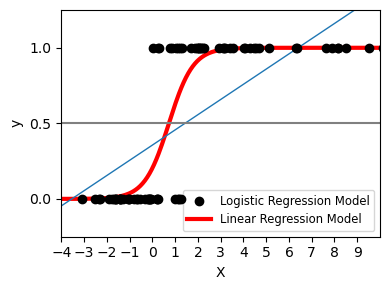

<Figure size 640x480 with 0 Axes>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn import linear_model

# plot을 그려주는 함수입니다.
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)
    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()
    plt.savefig('log_image.png')

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float64)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
"""
1. 로지스틱 회귀 모델을 구현하고, 
   학습 결과를 확인할 수 있는 main() 함수를 완성합니다. 
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    logistic_model = LogisticRegression()
    
    logistic_model.fit(train_X,train_y)
    
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted[:10])
    
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()

In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
"""
1. data 폴더 내에 있는 dataset.csv파일을 불러오고, 
   학습용 데이터와 테스트용 데이터를 분리하여 
   반환하는 함수를 구현합니다.
"""
def load_data():
    
    df = pd.read_csv('dataset.csv')
    
    X = df.drop('Class', axis = 1)
    y = df['Class']
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. SVM 모델을 불러오고,
   학습용 데이터에 맞추어 학습시킨 후, 
   테스트 데이터에 대한 예측 결과를 반환하는 함수를
   구현합니다.
"""
def SVM(train_X, test_X, train_y, test_y):
    
    svm = SVC()
    
    svm.fit(train_X,train_y)
    
    pred_y = svm.predict(test_X)
    
    return pred_y
    
# 데이터를 불러오고, 모델 예측 결과를 확인하는 main 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred_y = SVM(train_X, test_X, train_y, test_y)
    
    # SVM 분류 결과값을 출력합니다.
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 

if __name__ == "__main__":
    main()


Confusion matrix : 
 [[157   0]
 [  0 118]]

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
import numpy as np

"""
1. "확인" 이라는 키워드가 등장했을 때 
    해당 메일이 스팸 메일인지 정상 메일인지
    판별하기 위한 함수를 구현합니다.
"""
def bayes_theorem():

    spam_with_confirm = 5  # '확인'이 포함된 스팸 메일
    spam_without_confirm = 3  # '확인'이 포함되지 않은 스팸 메일
    ham_with_confirm = 2  # '확인'이 포함된 정상 메일
    ham_without_confirm = 10  # '확인'이 포함되지 않은 정상 메일
    total_ham = ham_with_confirm + ham_without_confirm
    total_spam = spam_with_confirm + spam_without_confirm
    total_mail = total_ham + total_spam
    p_confirm = (spam_with_confirm + ham_with_confirm) / total_mail
    
    # 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = total_spam / total_mail
    
    # 2. P(“확인” | “스팸 메일”) 의 확률을 구하세요.
    p_confirm_spam = spam_with_confirm / total_spam
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = total_ham / total_mail
    
    # 4. P(“확인” | "정상 메일" ) 의 확률을 구하세요.
    p_confirm_ham = ham_with_confirm / total_ham
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    p_spam_confirm = (p_confirm_spam * p_spam) / p_confirm
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    p_ham_confirm = (p_confirm_ham * p_ham) / p_confirm
    
    return p_spam_confirm, p_ham_confirm

def main():
    
    p_spam_confirm, p_ham_confirm = bayes_theorem()
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    
    if p_spam_confirm > p_ham_confirm:
        print( round(value[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(value[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")


if __name__ == "__main__":
    main()

P(spam|confirm) =  0.7142857142857143 
P(ham|confirm) =  0.2857142857142857 

71.43 % 의 확률로 스팸 메일에 가깝습니다.


In [11]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

"""
1. 데이터를 불러오고, 
   불러온 데이터를 학습용, 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    print("데이터 확인해보기 :\n", X[:1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state= 0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 가우시안 나이브 베이즈 모델을 불러오고,
   학습을 진행한 후 테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.
"""
def Gaussian_NB(train_X, test_X, train_y, test_y):
    
    model = GaussianNB()
    
    model.fit(train_X,train_y)

    predicted = model.predict(test_X)
    
    return predicted
    
# 데이터 불러오기, 모델 예측 결과를 확인할 수 있는 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    predicted = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    ## 모델 정확도를 통해 분류 성능을 확인해봅니다.
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted))

if __name__ == "__main__":
    main()

데이터 확인해보기 :
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

Model Accuracy : 
0.9166666666666666


Confusion matrix :
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]
Normalized confusion matrix :
 [[0.89473684 0.         0.10526316]
 [0.04545455 0.90909091 0.04545455]
 [0.07692308 0.53846154 0.38461538]]


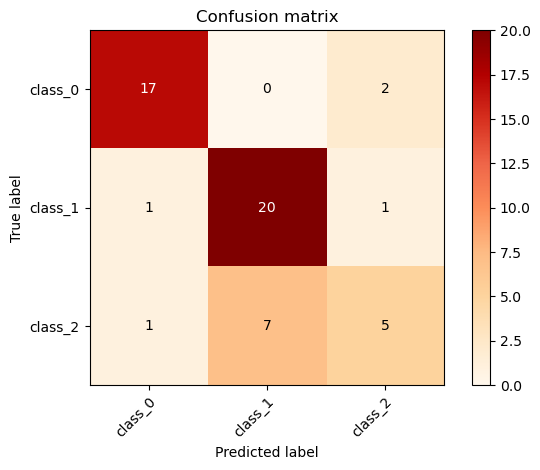

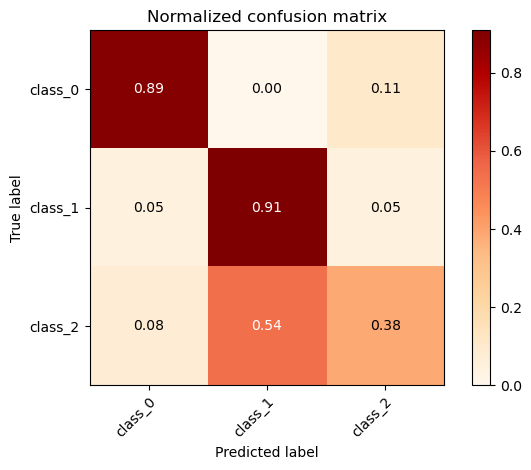

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# 데이터를 불러와 학습용, 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    X, y = load_wine(return_X_y = True)
    class_names = load_wine().target_names
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y, class_names

# Confusion matrix 시각화를 위한 함수입니다.
def plot_confusion_matrix(cm, y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
                          
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        # 정규화 할 때는 모든 값을 더해서 합이 1이 되도록 각 데이터를 스케일링 합니다.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title, ":\n", cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label을 45도 회전해서 보여주도록 변경
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # confusion matrix 실제 값 뿌리기
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.savefig('confusion matrix.png')

"""
1. 혼동 행렬을 계산하고, 
   시각화하기 위한 main() 함수를 완성합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y, class_names = load_data()
    
    # SVM 모델로 분류기를 생성하고 학습합니다.
    classifier = SVC()
    y_pred = classifier.fit(train_X, train_y).predict(test_X)
    
    cm = confusion_matrix(test_y, y_pred)
    
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names)
    
    # 정규화 된 혼동 행렬을 시각화합니다.
    plot_confusion_matrix(cm, test_y, y_pred, classes=class_names, normalize = True)
    
    return cm
    
if __name__ == "__main__":
    main()